In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore,pearsonr,ttest_1samp,ttest_ind,ttest_rel
from misc.cohensd import cohensd,cohens_d_onesample

pd.DataFrame.iteritems = pd.DataFrame.items
# Set the default plots style
sns.set_theme(style="white")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

# Set the default tick_params options for all axes
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.direction'] = 'out'

# Set default text color
plt.rcParams['text.color'] = 'black'

# Set default axes label color
plt.rcParams['axes.labelcolor'] = 'black'

# Set default x and y tick colors
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign=''
    return sign

# Supplemental figure1
- More detailed Training precedure (?)
- histgram of the subject number for each age
    - Game1&Game2
- histgram of the dropout subject number for each age
- histgram of the mean training number for each age

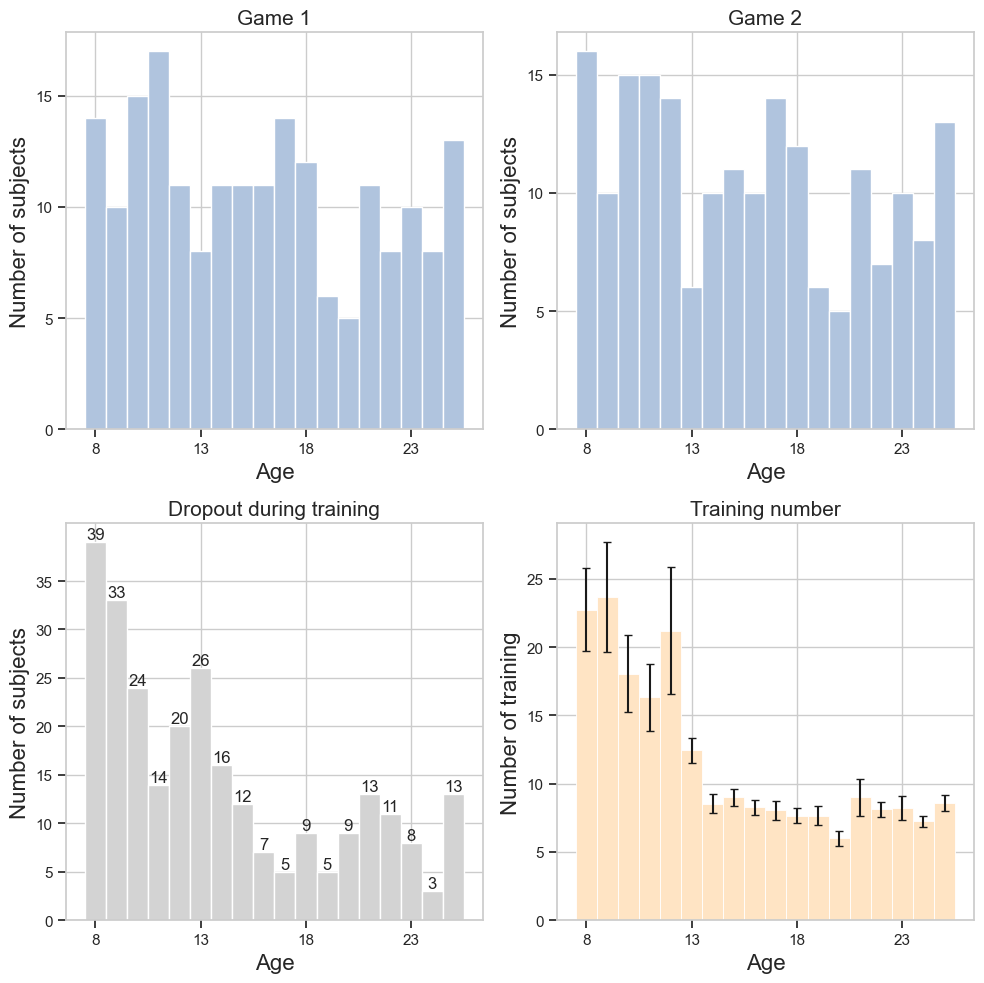

In [8]:
# Read data for game 1
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data_game1 = pd.read_csv(participants_file, sep='\t')

data_game1 = data_game1[data_game1['game1_fmri'] >= 0.5]
data_game1['training_acc'] = (data_game1['train_ap'] + data_game1['train_dp'])/2
data_game1 = data_game1.query('(training_acc>0.84)|(Age>12)')
#
# Read data for game 2
data_game2 = pd.read_csv(participants_file, sep='\t')
data_game2 = data_game2[data_game2['game2_fmri'] >= 0.5]

# Read dropout data
dropout_file = pd.read_excel(r"/mnt/workdir/DCM/Result/analysis/Online_training/participants_drop_out.xlsx")

# Read training data
training_file = pd.read_excel(r'/mnt/workdir/DCM/Result/analysis/Online_training/Valid information_203.xlsx')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))
bar_width = 1
# Plot for game 1
ages_game1 = [group[0] for group in data_game1.groupby('Age')]
nums_game1 = [len(group[1]) for group in data_game1.groupby('Age')]

rects1 = axs[0, 0].bar(ages_game1, nums_game1,width=bar_width,color='lightsteelblue')
axs[0, 0].set_xlabel("Age", size=16)
axs[0, 0].set_ylabel("Number of subjects", size=16)
axs[0, 0].set_xticks(np.arange(min(ages_game1), max(ages_game1)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 0].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # Set y-ticks to appear every 5 units
axs[0, 0].set_title("Game 1", size=15)
#axs[0, 0].bar_label(rects1, padding=3, size=14)

# Plot for game 2
ages_game2 = [group[0] for group in data_game2.groupby('Age')]
nums_game2 = [len(group[1]) for group in data_game2.groupby('Age')]

rects2 = axs[0, 1].bar(ages_game2, nums_game2,width=bar_width,color='lightsteelblue')
axs[0, 1].set_xlabel("Age", size=16)
axs[0, 1].set_ylabel("Number of subjects", size=16)
axs[0, 1].set_xticks(np.arange(min(ages_game2), max(ages_game2)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 1].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # # Set y-ticks to be same as game 1
axs[0, 1].set_title("Game 2", size=15)
#axs[0, 1].bar_label(rects2, padding=3, size=14)

# Plot for dropout
ages_dropout = [group[0] for group in dropout_file.groupby('Age')]
nums_dropout = [len(group[1]) for group in dropout_file.groupby('Age')]

rects3 = axs[1, 0].bar(ages_dropout, nums_dropout,width=bar_width, color='lightgrey')
axs[1, 0].set_xlabel("Age", size=16)
axs[1, 0].set_ylabel("Number of subjects", size=16)
axs[1, 0].set_xticks(np.arange(min(ages_dropout), max(ages_dropout)+1, 5))
axs[1, 0].set_yticks(np.arange(0, max(nums_dropout), 5))
axs[1, 0].set_title("Dropout during training", size=15)
#axs[1, 0].bar_label(rects3, padding=3, size=14)
axs[1, 0].bar_label(rects3, fmt='{:,.0f}',size=12)

# Calculate the mean and se of total_counts for each age
mean_counts = training_file.groupby('Age')['Total_Counts'].mean()
se_counts = training_file.groupby('Age')['Total_Counts'].sem()

# Define the x positions for the bars
ages = mean_counts.index

# Plot the bar plot with error bars
axs[1, 1].bar(ages, mean_counts, yerr=se_counts, capsize=3,width=bar_width,linewidth=0.6, color='bisque')

# Set the x-axis limits, ticks, and labels
axs[1, 1].set_xticks([8,13,18,23])
axs[1, 1].set_xticklabels([8,13,18,23])

# Set the labels and title
axs[1, 1].set_xlabel("Age", size=16)
axs[1, 1].set_ylabel("Number of training", size=16)
axs[1, 1].set_title("Training number", size=15)

# Add tick lines to the bottom and left spines for all subplots
for ax in axs.flat:
    #ax.set_xticks(np.arange(min(training_file['Age']), max(training_file['Age'])+1, 5))
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')

fig.tight_layout()

# Save the figure
# savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf1/subjects_barplot.pdf'
# plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
# plt.show()

In [22]:
# Maximum number of training number
training_file['Total_Counts'].max()

64

In [9]:
print(len(dropout_file))
dropout_file['Name'] = dropout_file['姓名']

all_subjects = pd.concat([dropout_file,training_file],ignore_index=True)

267


[Text(0, 0, '55'),
 Text(0, 0, '45'),
 Text(0, 0, '40'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '27'),
 Text(0, 0, '23'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '21'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '11'),
 Text(0, 0, '26')]

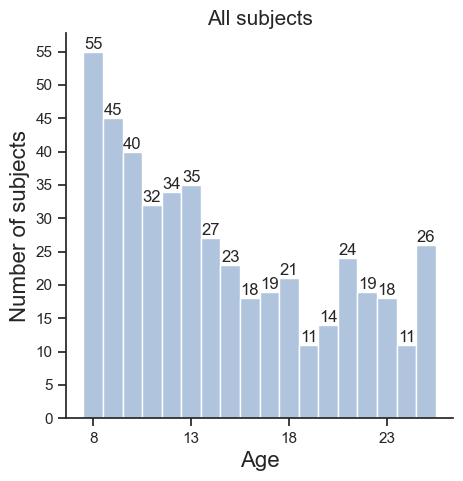

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
bar_width = 1
ages_all = [group[0] for group in all_subjects.groupby('Age')]
nums_all = [len(group[1]) for group in all_subjects.groupby('Age')]

rects = ax.bar(ages_all, nums_all,width=bar_width,color='lightsteelblue')
ax.set_xlabel("Age", size=16)
ax.set_ylabel("Number of subjects", size=16)
ax.set_xticks(np.arange(min(ages_all), max(ages_all)+1, 5))  # Set x-ticks to appear every 5 years
ax.set_yticks(np.arange(0, max(nums_all)+1, 5))  # # Set y-ticks to be same as game 1
ax.set_title("All subjects", size=15)
ax.bar_label(rects, fmt='{:,.0f}',size=12)

In [40]:
def quality_check(row):
    if ((row['Age'] >= 18) and (row['fd_mean'] > 0.2)) or ((row['Age'] < 18) and (row['fd_mean'] > 0.3)):
        return 'bad'
    else:
        return 'good'

# set task
tasks = ['game1','game2']
runs = [range(1,7), range(1,3)]

# specify subjects
participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
subs_hm = pd.DataFrame(columns=['sub_id', 'Age','task', 'run', 'fd_mean'])

#hd_metrics_template = r'/mnt/workdir/DCM/BIDS/derivatives/head_motion/raw_data/{}/func/{}_task-{}_run-{}_bold/metrics.txt'
hd_metrics_template = r'/mnt/workdir/DCM/BIDS/derivatives/head_motion/preprocessed_data/{}/func/{}_task-{}_run-{}_space-T1w_desc-preproc_bold_trimmed/metrics.txt'

for task,run_list in zip(tasks,runs):
    data = participants_data.query(f'{task}_fmri>=0.5')
    sub_list = data['Participant_ID'].to_list()
    sub_age = data['Age'].to_list()
    for sub, age in zip(sub_list, sub_age):
        sub_hd_metrics = []
        for run_id in run_list:
            #run_id = str(run_id).zfill(2)
            hd_metric_file = hd_metrics_template.format(sub, sub, task, run_id)
            hd_metrics = np.loadtxt(hd_metric_file)
            sub_hd_metrics.append(hd_metrics)
            mean_fd = np.round(np.mean(np.concatenate(sub_hd_metrics)),5)
            #mean_fd = np.round(np.mean(sub_hd_metrics),2)
            outlier = [f for f in hd_metrics if f> 0.5]
            subs_hm = pd.concat([subs_hm,
                      pd.DataFrame({'sub_id': [sub], 'Age': [age], 'task': [task], 'run': [run_id], 'fd_mean': [mean_fd],
                                    'outlier_num': [len(outlier)]})],axis=0)
subs_hm['quality'] = subs_hm.apply(quality_check, axis=1)
# subs_hm['Age'] = subs_hm['Age'].astype(float)
subs_hm.to_csv(r'/mnt/workdir/DCM/BIDS/derivatives/head_motion/preprocessed_data_rms.csv')

/tmp/ipykernel_204481/1930018847.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_task.dropna(inplace=True)
/tmp/ipykernel_204481/1930018847.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_task.dropna(inplace=True)


r = -0.549903859070929 p = 3.413408578620467e-97 for task = game1
r = -0.5247557698187975 p = 1.0693327502766738e-28 for task = game2


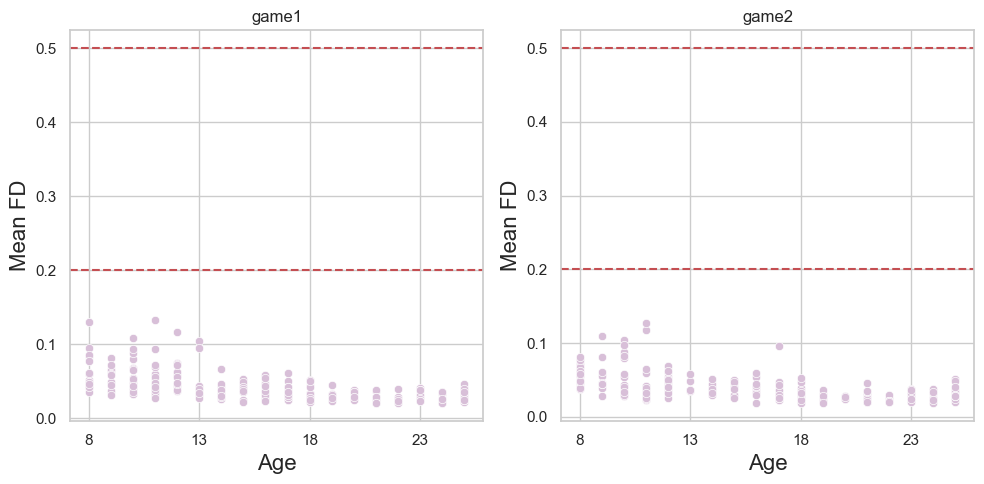

In [41]:
#subs_hm = pd.read_csv(r'/mnt/workdir/DCM/Result/analysis/quality_control/participants_data_quality.csv')
bad_subs = subs_hm.query('quality=="bad"')
#print(bad_subs)

# create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# list of unique tasks
#tasks = subs_hm['task'].unique()
tasks = ['game1','game2']

for i, task in enumerate(tasks):
    # subset the data for each task
    subs_task = subs_hm[subs_hm['task']==task]
    # drop the rows which contains nan
    subs_task.dropna(inplace=True)

    subs_task_fd_avg = subs_task.groupby("sub_id")['fd_mean'].mean()
    subs_task_age_avg = subs_task.groupby("sub_id")['Age'].mean()

    # create a scatterplot with regression for each task
    sns.scatterplot(x=subs_task_age_avg, y=subs_task_fd_avg, color='thistle', ax=axs[i]).set_title(task)

    # set labels for the axes
    #axs[i].set_ylim(0,0.3)
    axs[i].set_xlabel('Age', fontsize=16)
    axs[i].set_ylabel('Mean FD', fontsize=16)
    # Set the x-axis limits, ticks, and labels
    axs[i].set_xticks([8,13,18,23])
    axs[i].set_xticklabels([8,13,18,23])
    # calculate and print pearson correlation
    r, p = pearsonr(subs_task['Age'], subs_task['fd_mean'])
    print(f'r = {r} p = {p} for task = {task}')
    # add a horizontal line
    axs[i].axhline(y=0.2, color='r', linestyle='--')
    axs[i].axhline(y=0.5, color='r', linestyle='--')

# show the plot
plt.tight_layout()
# plt.savefig('/mnt/workdir/DCM/Result/paper/sf/sf1/age_fd_raw.pdf', bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)
plt.show()

In [52]:
import numpy as np
import pandas as pd
fmriprep_rms = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/fmriprep_volume_fmapless/fmriprep/sub-043/func/sub-043_task-game1_run-1_desc-confounds_timeseries_trimmed.tsv',sep='\t')['framewise_displacement'].to_list()
fmriprep_rms = np.nan_to_num(fmriprep_rms)
fsl_rms = np.loadtxt("/mnt/workdir/DCM/BIDS/derivatives/head_motion/raw_data/sub-043/func/sub-043_task-game1_run-01_bold/metrics.txt")
fsl_rms = np.nan_to_num(fsl_rms)[:161]

#### Supplemental figure2:
- heatmap for poistion and bar radar plot for sampling angle
- hexagonal modulation(F-test) (?)
- RSA (?)
    - whole trials results

In [5]:
# Get subject's trial attribute
from analysis.mri.event.base import GAME1EV

class GAME1EV_trials_attribute(GAME1EV):
    def __init__(self, behDataPath):
        GAME1EV.__init__(self, behDataPath)

    def get_trial_attribute(self,phi):
        angle = self.behData['angles']
        pic1_ap = self.behData['pic1_ap']
        pic1_dp = self.behData['pic1_dp']

        pic2_ap = self.behData['pic2_ap']
        pic2_dp = self.behData['pic2_dp']
        
        distance = np.sqrt(self.behData['ap_diff'] ** 2 + self.behData['dp_diff'] ** 2)
        trials_info = pd.DataFrame({'pic1_ap':pic1_ap,'pic1_dp':pic1_dp,'pic2_ap':pic2_ap,'pic2_dp':pic2_dp,
                                    'angle':angle,'distance':distance})
        trial_label,_ = self.label_trial_corr()
        trial_rt = self.get_rt()
        # calculate the value
        value = []
        true_value = []
        for row in self.behData.itertuples():
            rule = row.fightRule
            if rule == '1A2D':
                v = row.pic1_ap - row.pic2_dp
                value.append(np.abs(v))
                true_value.append(v)
            elif rule == '1D2A':
                v = row.pic2_ap - row.pic1_dp
                value.append(np.abs(v))
                true_value.append(v)
        
        trials_info['trial_corr'] = [1 if t else 0 for t in trial_label]
        trials_info['RT'] = trial_rt
        trials_info['value'] = value
        trials_info['true_value'] = true_value

        # according to hexagonal effect and split distance into two types(align and misalign)
        # label alignment trials and misalignment trials according to the angle and Phi
        alignedD_360 = [(a-phi) % 360 for a in angle]
        anglebinNum = [round(a/30)+1 for a in alignedD_360]
        anglebinNum = [1 if a == 13 else a for a in anglebinNum]

        trials_alignment = []
        for binNum in anglebinNum:
            if binNum in range(1,13,2):
                trials_alignment.append(f'align')
            elif binNum in range(2,13,2):
                trials_alignment.append(f'misalign')
        trials_info['alignment'] = trials_alignment
        return trials_info

task = 'game1'
if task == 'game1':
    runs = range(1, 7)
    behav_template = '/mnt/workdir/DCM/sourcedata/sub_{}/Behaviour/' \
                     'fmri_task-game1/sub-{}_task-{}_run-{}.csv'
elif task == 'game2':
    runs = range(1, 3)
    behav_template = '/mnt/workdir/DCM/sourcedata/sub_{}/Behaviour/' \
                     'fmri_task-game2-test/sub-{}_task-{}_run-{}.csv'
else:
    raise Exception("You need specify a correct task name.")

participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
subjects = participants_data.query(f'{task}_fmri>=0.5')['Participant_ID'].str.split('-').str[-1].str.zfill(3)

phis_file = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexagon_spct/estPhi_ROI-EC_circmean_trial-all.csv'
phis_data = pd.read_csv(phis_file)

df = pd.DataFrame()
for subj in subjects:
    #print(f'----sub-{subj}----')
    phi = phis_data.query(f'(sub_id=="sub-{subj}")and(ifold=="6fold")')['Phi_mean'].values[0]
    for idx in runs:
        run_id = str(idx)
        behav_path = behav_template.format(subj, subj, task, run_id)
        game1ev = GAME1EV_trials_attribute(behav_path)
        trials_info = game1ev.get_trial_attribute(phi)
        trials_info['sub_id'] = 'sub-' + subj
        df = pd.concat([df,trials_info], axis=0)
df.to_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv',index=False)
print('Completed.')

Completed.


In [84]:
import pandas as pd

df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')
participants_file = r'/mnt/workdir/DCM/BIDS/participants.xlsx'
data = pd.read_excel(participants_file)
data = data[data['game1_fmri']>=0.5]

age_data = data.query(f'Participant_ID in {tuple(df["sub_id"].unique())}')[['Participant_ID', 'Age']]
df = df.merge(age_data, left_on='sub_id', right_on='Participant_ID', how='left')

age_bins = [7, 12, 17, 25]
age_labels = ['children', 'adolescents', 'adults']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
# Calculate mean accuracy and mean RT for each distance and age group
mean_accuracy = df.groupby(['Age_group','distance','value'])['trial_corr'].mean().reset_index()
mean_rt = df.groupby(['Age_group','distance','value'])['RT'].mean().reset_index()

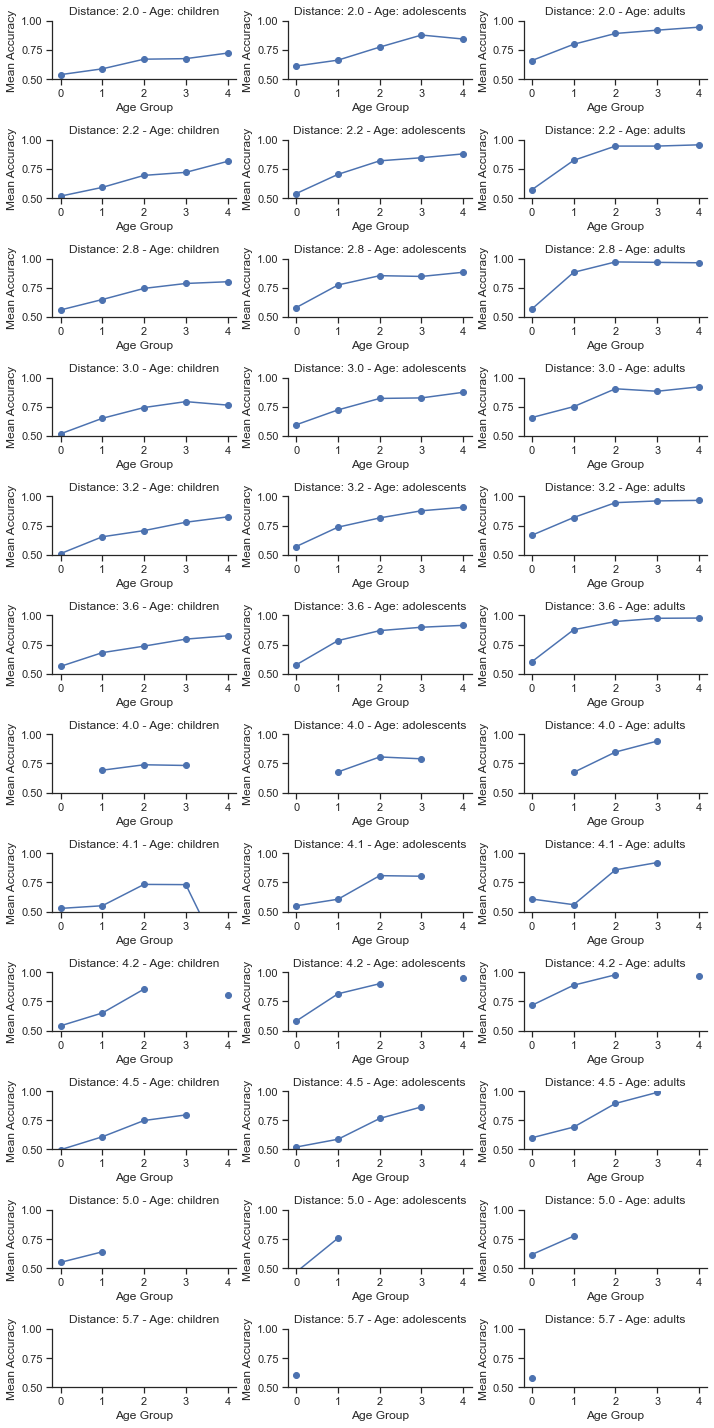

In [55]:
age_labels = ['children', 'adolescents', 'adults']
value_categories = [0,1,2,3,4]
distance_categories = list(mean_accuracy['distance'].unique())
distance_categories.sort()
fig, axes = plt.subplots(nrows=len(distance_categories), ncols=len(age_labels), figsize=(10,20))

for i, distance in enumerate(distance_categories):
    distance_data = mean_accuracy[mean_accuracy['distance'] == distance]

    for j, age_group in enumerate(age_labels):
        age_group_distance_data = distance_data[distance_data['Age_group'] == age_group]
        ax = axes[i, j]
        ax.plot(age_group_distance_data['value'], age_group_distance_data['trial_corr'], marker='o')
        ax.set_title(f'Distance: {round(distance,1)} - Age: {age_group}')
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Mean Accuracy')
        ax.set_ylim(0.5, 1)  # Adjust y-axis limit for better visualization
        ax.set_xlim(-0.2, 4.2)

# Adjust layout
plt.tight_layout()
plt.show()

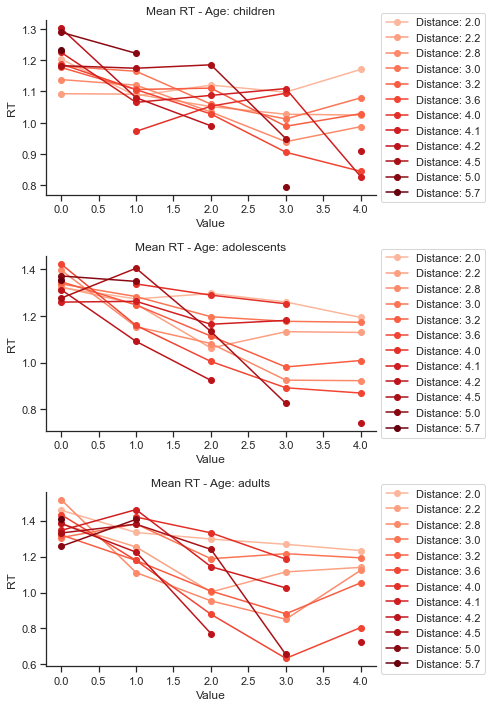

In [88]:
distance_categories = list(mean_rt['distance'].unique())
distance_categories.sort()
fig, axes = plt.subplots(nrows=len(age_labels), ncols=1, figsize=(7,10))

for j, age_group in enumerate(age_labels):
    age_group_data = mean_rt[mean_rt['Age_group'] == age_group]
    ax = axes[j]

    # Define color map based on distance values
    cmap = plt.get_cmap('Reds', len(distance_categories)+4)

    for idx, distance in enumerate(distance_categories):
        distance_data = age_group_data[age_group_data['distance'] == distance]
        ax.plot(distance_data['value'], distance_data['RT'], marker='o',
                label=f'Distance: {round(distance, 1)}', color=cmap(idx+4),alpha=1)

    ax.set_title(f'Mean RT - Age: {age_group}')
    ax.set_xlabel('Value')
    ax.set_ylabel('RT')
#    ax.set_ylim(0.5, 1)  # Adjust y-axis limit for better visualization
    ax.set_xlim(-0.2, 4.2)  # Adjust x-axis limit for better visualization
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside of figure

# Adjust layout
plt.tight_layout()
plt.show()

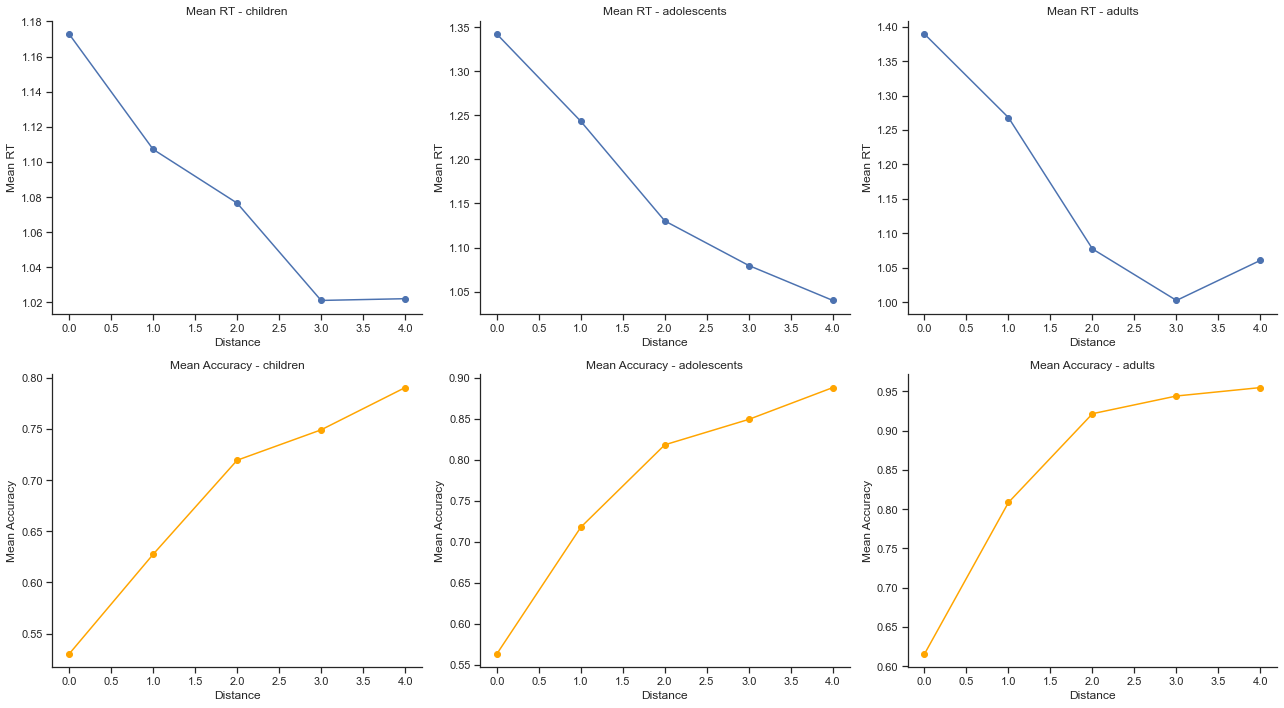

In [29]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=len(age_labels), figsize=(18, 10))

# Plot mean RT for each age group
for i, age_group in enumerate(age_labels):
    age_group_data = mean_rt[mean_rt['Age_group'] == age_group]
    ax = axes[0, i]
    ax.plot(age_group_data['distance'], age_group_data['RT'], marker='o')
    ax.set_title(f'Mean RT - {age_group}')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Mean RT')
    

# Plot mean accuracy for each age group
for i, age_group in enumerate(age_labels):
    age_group_data = mean_accuracy[mean_accuracy['Age_group'] == age_group]
    ax = axes[1, i]
    ax.plot(age_group_data['distance'], age_group_data['trial_corr'], marker='o', color='orange')
    ax.set_title(f'Mean Accuracy - {age_group}')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Mean Accuracy')
    
# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
# Create a 2x3 grid of subplots
import plotly.subplots as sp
import plotly.graph_objs as go

# Create polar bar chart for mean RT
# Create subplots with 2 rows and 1 column
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2,
                       subplot_titles=[f'Mean Accuracy - {age}' for age in age_groups])

# Create polar bar chart for mean accuracy for each age group
for i, age_group in enumerate(age_labels, start=1):
    age_group_data = mean_accuracy[mean_accuracy['Age_group'] == age_group]
    fig.add_trace(
        go.Barpolar(r=age_group_data['trial_corr'], theta=age_group_data['angle'],
                    name=age_group),
        row=i, col=1
    )

# Update subplot layout
for i in range(1, 3):
    fig.update_polars(row=i, col=1, bgcolor='rgba(0,0,0,0)', radialaxis_showgrid=False)

# Update overall layout
fig.update_layout(title_text='Mean Accuracy by Age Group', title_x=0.5, template='plotly_dark')

# Display the plot
fig.show()

ValueError: Trace type 'barpolar' is not compatible with subplot type 'xy'
at grid position (1, 1) 

See the docstring for the specs argument to plotly.subplots.make_subplots 
for more information on subplot types

<ipython-input-48-153820a4a49b>:64: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[1] = plt.subplot(1,2,2, projection='polar')


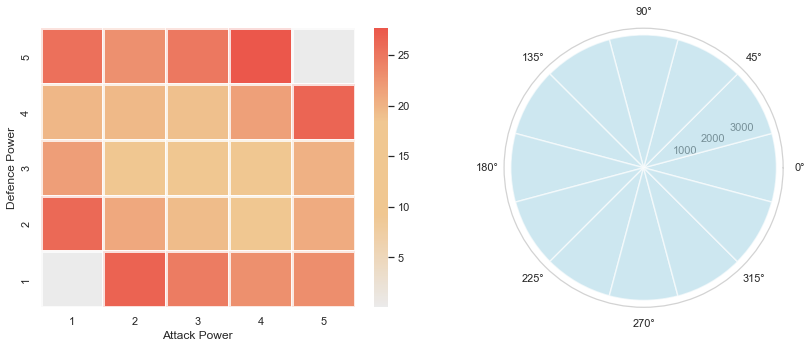

In [48]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')
#df = df[df['trial_corr']==1]
m1_pos_matrix = np.zeros((5,5))
m2_pos_matrix = np.zeros((5,5))

for row in df.itertuples():
    m1_pos_matrix[int(5-row.pic1_dp),int(row.pic1_ap-1)] +=1
    m2_pos_matrix[int(5-row.pic2_dp),int(row.pic2_ap-1)] +=1

pos_matrix = m1_pos_matrix + m2_pos_matrix

fig, axs = plt.subplots(1, 2, figsize=(12,5))
# define start and end color
start_color = [0.9, 0.9, 0.9]
middle_color1 = [0.9284313725490196, 0.7245098039215687, 0.46176470588235297]#'#f48c06'# white
middle_color2 = [0.9284313725490196, 0.7245098039215687, 0.46176470588235297]#[252/255, 90/255, 60/255] # light orange
end_color = [0.9019607843137255, 0.17647058823529413, 0.11764705882352941]#'#d00000'# red-orange

# Create a colormap with more color distinction
cmap = LinearSegmentedColormap.from_list("my_colormap", [start_color, middle_color1,middle_color2,end_color])


# plot heatmap for position matrix
sns.heatmap(pos_matrix/203, ax=axs[0],cmap=cmap,alpha=0.8,annot=False, fmt=".0f", annot_kws={"size": 12,"color": "black"},
            cbar_kws={'ticks': [0,5,10,15,20,25]},
            linecolor="white", linewidths=3)

# change x and y-axis labels
axs[0].set_xticklabels([1,2,3,4,5])
axs[0].set_yticklabels([5,4,3,2,1])
# Add x and y-axis titles
axs[0].set_xlabel("Attack Power")
axs[0].set_ylabel("Defence Power")

def angle2binNum(angles):
    alignedD_360 = [a % 360 for a in angles]
    anglebinNum = [round(a/30)+1 for a in alignedD_360]
    anglebinNum = [1 if binN == 13 else binN for binN in anglebinNum]

    # Compute pie slices
    N = int(360/30)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    binsAngleNum = []
    for binNum in range(1,13):
        binAngleNum = 0
        for a in anglebinNum:
            if a == binNum:
                binAngleNum +=1
        binsAngleNum.append(binAngleNum)
    return binsAngleNum

angles = df['angle'].to_list()
# plot the distribution of the stalemate trials
binsAngleNum = angle2binNum(angles)
binsAngleNum = [b for b in binsAngleNum]
N = int(360/30)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
width = 2*np.pi / (N)

# Polar plot
axs[1] = plt.subplot(1,2,2, projection='polar')
axs[1].bar(theta, binsAngleNum,width=width,bottom=0.0, alpha=0.6,linewidth=1.5,edgecolor='white',color='lightblue')
axs[1].set_yticks([1000,2000,3000])
axs[1].grid(alpha=0.6, color='white', lw=3)
# Change the color of the x-axis line
axs[1].spines['polar'].set_color('lightgrey')

plt.tight_layout()
plt.savefig('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_sample/trials_sample_frequency.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

# Supplemental figure3:
- ROI analysis for other region's distance effect:
    - such as HC,EC,LOFC,PCC
    - covariate effect
- Distancne distribution between align vs misalign
- Distance code(algin - misalign) covary with age in EC.

### Distancne distribution between align vs misalign

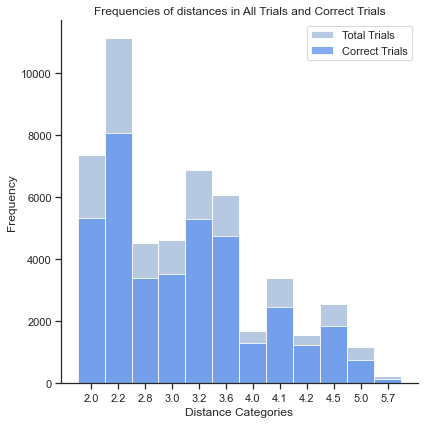

In [4]:
df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')

# Ensure 'distance' is treated as a categorical variable
df['distance'] = df['distance'].round(1)
df['distance'] = df['distance'].astype(str)

# Get the unique categories and sort them
categories = sorted(df['distance'].unique())

# Count occurrences of each category for all trials and correct trials
all_counts = df['distance'].value_counts().sort_index()
correct_counts = df[df['trial_corr'] == 1]['distance'].value_counts().sort_index()

# Create an array for the positions of the bars on the x-axis
ind = np.arange(len(categories))

# Initialize the matplotlib figure
plt.figure(figsize=(6, 6))

# Width of the bars
width = 1

# Create bar plots
plt.bar(ind, all_counts, width, label='Total Trials', alpha=0.9, color='lightsteelblue')
plt.bar(ind, correct_counts, width, label='Correct Trials', alpha=0.8, color='cornflowerblue')

# Add a legend and informative axis label
plt.legend()
plt.ylabel("Frequency")
plt.title("Frequencies of distances in All Trials and Correct Trials")

# x-axis configurations
plt.xticks(ind, categories)
plt.xlabel("Distance Categories")

# Add tick lines to the bottom and left spines for all subplots
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
plt.tick_params(axis='y', which='both', left=True, right=False, direction='out')


plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_sample_distribution.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
# Show the plot
plt.show()

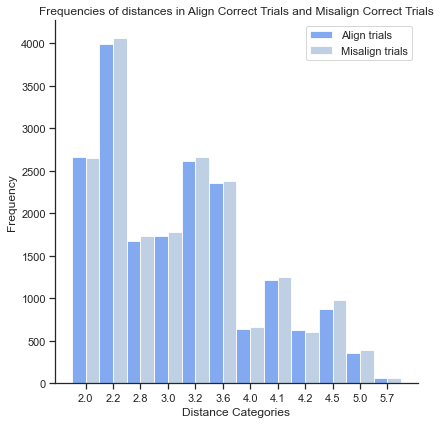

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')

# Ensure 'distance' is treated as a categorical variable
df['distance'] = df['distance'].round(1)
df['distance'] = df['distance'].astype(str)

# Get the unique categories and sort them
categories = sorted(df['distance'].unique())

# Count occurrences of each category for align and misalign correct trials
align_counts = df[(df['trial_corr'] == 1) & (df['alignment'] == 'align')]['distance'].value_counts().sort_index()
misalign_counts = df[(df['trial_corr'] == 1) & (df['alignment'] == 'misalign')]['distance'].value_counts().sort_index()

# Create an array for the positions of the bars on the x-axis
ind = np.arange(len(categories))

# Initialize the matplotlib figure
plt.figure(figsize=(6, 6))

# Width of the bars
width = 0.5

# Create bar plots
plt.bar(ind, align_counts, width, label='Align trials', alpha=0.8, color='cornflowerblue')
plt.bar(ind+width, misalign_counts, width, label='Misalign trials', alpha=0.8, color='lightsteelblue')

# Add a legend and informative axis label
plt.legend()
plt.ylabel("Frequency")
plt.title("Frequencies of distances in Align Correct Trials and Misalign Correct Trials")

# x-axis configurations
plt.xticks(ind + width / 2, categories)
plt.xlabel("Distance Categories")

# Add tick lines to the bottom and left spines for all subplots
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
plt.tick_params(axis='y', which='both', left=True, right=False, direction='out')

plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_sample_distribution_alignVSmisalign.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)

# Show the plot
plt.show()

### ROI analysis for distance effect

In [12]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
from scipy.stats import zscore
import ptitprince as pt
from scipy.stats import stats


def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign


def apply_mask_and_get_activity(cmap_paths, mask):
    return np.mean(masking.apply_mask(cmap_paths, mask), axis=1)


def plot_mean_activity(subs_mean_activity, data, ax):
    sub_label = data['acc_binary']
    hp_act = [act for act,l in zip(subs_mean_activity,sub_label) if l==1]
    act_data = pd.DataFrame({'AS':pd.Series(subs_mean_activity),'HS':pd.Series(hp_act)}) # Create an offset column

    pt.RainCloud(data=act_data, orient='v',linewidth=0, palette=['lightgray','#cca3ff'],scale='area',width_viol=1,
                 bw=0.3,move=0.15,offset=0.05,ax=ax)

    # Create error bar
    ax.hlines(y=0, xmin=-1, xmax=1.5, color='dimgray',linestyle='--',linewidth=0.75)
    mean = np.mean(subs_mean_activity)
    se = stats.sem(subs_mean_activity)
    ax.errorbar(x=0.15, y=mean, yerr=se, color='black', fmt='d',capsize=6,capthick=1.3,markersize=3)
    mean = np.mean(hp_act)
    se = stats.sem(hp_act)
    ax.errorbar(x=1.15, y=mean, yerr=se, color='slateblue', fmt='d',capsize=6,capthick=1.3,markersize=4)

    # plot significant star
    t1, p1 = ttest_1samp(subs_mean_activity, 0)
    cd = cohens_d_onesample(subs_mean_activity, 0)
    print('All subjects: t:',round(t1,4),'p:',round(p1,4), "Cohen's d:",round(cd,4))
    ax.text(0.1, 2.7, p2sign(p1),ha='center', va='bottom',weight='bold',size=20)
    t2, p2 = ttest_1samp(hp_act, 0)
    cd = cohens_d_onesample(hp_act, 0)
    print('HP subjects: t:',round(t2,4),'p:',round(p2,4), "Cohen's d:",round(cd,4))
    ax.text(1.05, 2.7, p2sign(p2),ha='center', va='bottom',weight='bold',size=20)

    ax.set_xlim(-0.8,1.5)
    ax.set_ylim(-3,3)


def plot_covariate_relationship(sub_data,covariate_name, activity_data, ax, roi_name,task):
    # Setup variables based on covariate
    if covariate_name == 'Age':
        color = '#e36570'
        covary_variable = sub_data['Age'].to_list()
        xlabel = 'Age'
        ticks = [8, 12, 16, 20, 24]

    elif covariate_name == 'Acc':
        color = '#F8A485'#'#F8B195'
        if task == 'game1':
            covary_variable = sub_data['game1_acc'].to_list()
        elif task == 'game2':
            covary_variable = sub_data['game2_test_acc'].to_list()
        xlabel = 'Inference performance'
        ticks = [0.4, 0.6, 0.8, 1.0]
    sns.scatterplot(x=covary_variable, y=activity_data, color=color, s=10, alpha=0.8, ax=ax)
    sns.regplot(x=covary_variable, y=activity_data, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)
    #ax.set_xlabel(roi_name, fontsize=20)
    ax.set_ylabel('Mean activity', fontsize=20)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    r, p = pearsonr(covary_variable, activity_data)
    print(roi_name, covariate_name, 'r:',round(r,4), 'p:',round(p,4))
    title = p2sign(p)
    ax.set_title(title, size=20, fontweight='bold')
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')


def multi_roi_analysis(query_condition, cmap_template, roi_names, rois, savepath):
    # specify subjects
    participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
    participants_data = pd.read_csv(participants_tsv, sep='\t')
    data = participants_data.query(query_condition)
    subjects = data['Participant_ID'].to_list()
    data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)

    # set cmap
    sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

    # Compute mean activity
    # Apply masks and get activity for each ROI
    roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, roi) for roi in rois]

    # Plotting
    fig, axes = plt.subplots(3, 5, figsize=(10,10))

    # Plot the mean activity for each ROI
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        print(roi_name,':')
        plot_mean_activity(roi_activity, data, axes[0, i])
        axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        if i > 0:
            axes[0, i].set_ylabel('')

    # Plot the covariate relationship for each ROI with 'Age'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name,'game1')
        if i > 0:
            axes[1, i].set_ylabel('')
        axes[1, i].set_xticks([8, 13, 18, 23])
        axes[1, i].yaxis.set_major_locator(MaxNLocator(nbins=4))

    # Plot the covariate relationship for each ROI with 'Acc'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name,'game1')
        if i > 0:
            axes[2, i].set_ylabel('')
        axes[2, i].set_xticks([0.5, 0.75, 1.0])
        axes[2, i].yaxis.set_major_locator(MaxNLocator(nbins=4))

    for i in range(3):
        for j in range(5):
            if i < 2:
                axes[i, j].set_xlabel('')

    # Show the plot
    plt.tight_layout()
    #plt.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_3260176/1094128572.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 0.6044 p 0.5463
HP subjects: t: 2.4104 p 0.0184
mPFC :
All subjects: t: 4.4243 p 0.0
HP subjects: t: 5.5313 p 0.0
HC :
All subjects: t: 2.2779 p 0.0238
HP subjects: t: 3.9184 p 0.0002
LOFC :
All subjects: t: 3.5842 p 0.0004
HP subjects: t: 5.3414 p 0.0
PCC :


/tmp/ipykernel_3260176/1094128572.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_3260176/1094128572.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_3260176/1094128572.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_3260176/1094128572.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_3260176/1094128572.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_3260176/1094128572.

All subjects: t: 2.111 p 0.036
HP subjects: t: 3.5466 p 0.0007
EC Age r: 0.0949 p: 0.1778
mPFC Age r: 0.2435 p: 0.0005
HC Age r: 0.0799 p: 0.2569
LOFC Age r: 0.1686 p: 0.0162
PCC Age r: 0.0743 p: 0.2922
EC Acc r: 0.1373 p: 0.0507
mPFC Acc r: 0.2376 p: 0.0006
HC Acc r: 0.1633 p: 0.0199
LOFC Acc r: 0.2024 p: 0.0038
PCC Acc r: 0.1592 p: 0.0233


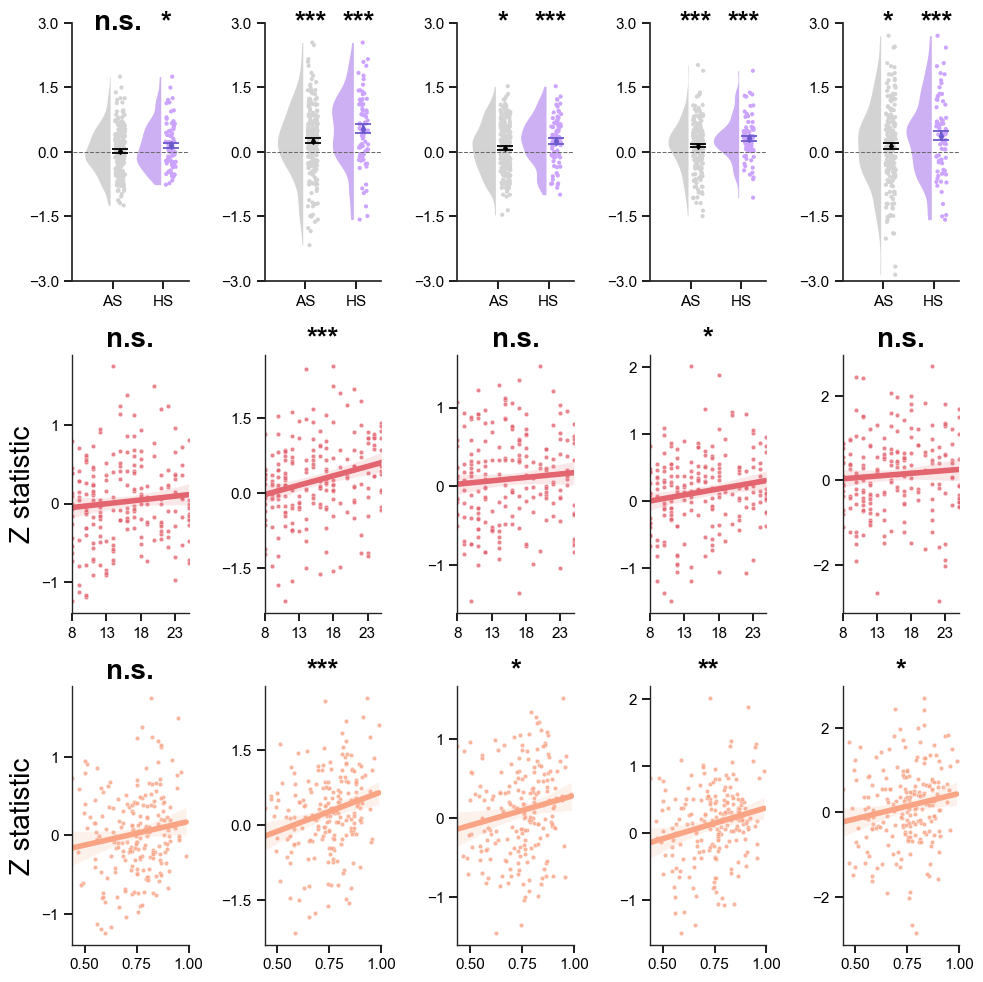

In [24]:
query_condition = 'game1_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/distance_spct/Setall/6fold/{}/zmap/distance_zmap.nii.gz'
rois_names = ['EC','mPFC','HC','LOFC','PCC']
# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')

rois = [ec,mPFC,hc,ofc,pcc]
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition, cmap_template, rois_names, rois, savepath)

### ROI analysis for distance effect(Align - misalign)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_3260176/1094128572.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: -0.1901 p 0.8494
HP subjects: t: 1.5986 p 0.1142
mPFC :
All subjects: t: 2.6832 p 0.0079
HP subjects: t: 3.0657 p 0.003
HC :
All subjects: t: 0.5621 p 0.5747
HP subjects: t: 1.1654 p 0.2476
LOFC :
All subjects: t: 1.8385 p 0.0675
HP subjects: t: 3.172 p 0.0022
PCC :


/tmp/ipykernel_3260176/1094128572.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_3260176/1094128572.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_3260176/1094128572.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_3260176/1094128572.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_3260176/1094128572.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_3260176/1094128572.

All subjects: t: 2.054 p 0.0413
HP subjects: t: 2.5616 p 0.0125
EC Age r: 0.1703 p: 0.0151
mPFC Age r: 0.2198 p: 0.0016
HC Age r: 0.1382 p: 0.0493
LOFC Age r: 0.1871 p: 0.0075
PCC Age r: 0.0603 p: 0.3926
EC Acc r: 0.132 p: 0.0605
mPFC Acc r: 0.1333 p: 0.058
HC Acc r: 0.099 p: 0.16
LOFC Acc r: 0.1174 p: 0.0952
PCC Acc r: 0.0894 p: 0.2046


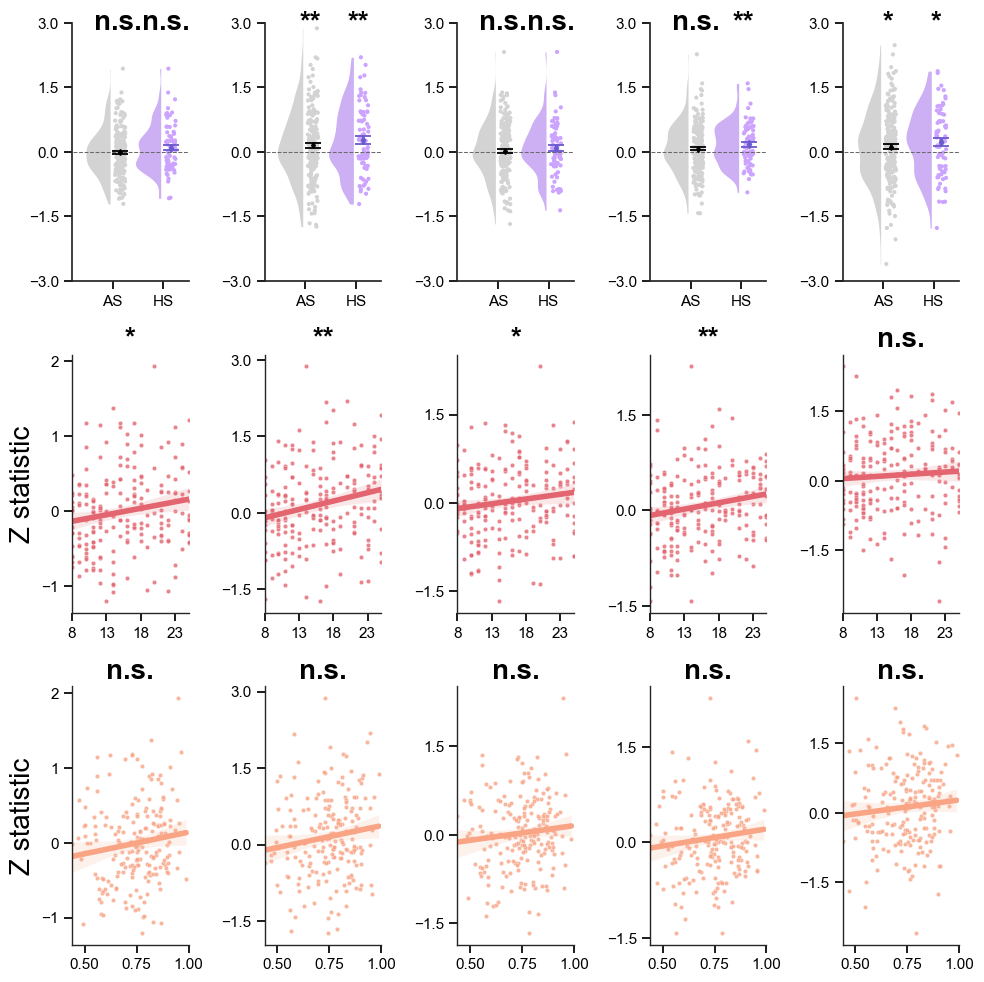

In [25]:
query_condition = 'game1_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexModdistance_spct/Setall/6fold/{}/zmap/hexModdistance_zmap.nii.gz'

rois_names = ['EC','mPFC','HC','LOFC','PCC']
# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')

rois = [ec,mPFC,hc,ofc,pcc]
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf3/hexModdistance_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition,cmap_template,rois_names,rois,savepath)

In [4]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
import pingouin as pg
from matplotlib import gridspec
from scipy.stats import stats
import ptitprince as pt


def plot_mean_activity(subs_mean_activity, data, ax):
    sub_label = data['acc_binary']
    hp_act = [act for act,l in zip(subs_mean_activity,sub_label) if l==1]
    act_data = pd.DataFrame({'All':pd.Series(subs_mean_activity),'HP':pd.Series(hp_act)}) # Create an offset column

    pt.RainCloud(data=act_data, orient='v',linewidth=0, palette=['lightgray','#cca3ff'],scale='area',width_viol=1,
                 bw=0.3,move=0.15,offset=0.05,ax=ax)

    # Create error bar
    ax.hlines(y=0, xmin=-1, xmax=1.5, color='dimgray',linestyle='--',linewidth=0.75)
    mean = np.mean(subs_mean_activity)
    se = stats.sem(subs_mean_activity)
    ax.errorbar(x=0.15, y=mean, yerr=se, color='black', fmt='d',capsize=7,capthick=1.5,markersize=3)
    mean = np.mean(hp_act)
    se = stats.sem(hp_act)
    ax.errorbar(x=1.15, y=mean, yerr=se, color='slateblue', fmt='d',capsize=7,capthick=2,markersize=4)

    # plot significant star
    t1, p1 = ttest_1samp(subs_mean_activity, 0)
    print('All subjects: t:',round(t1, 4),'p',round(p1,4))
    ax.text(0, 3.1, p2sign(p1),ha='center', va='bottom',weight='bold',size=20)
    t2, p2 = ttest_1samp(hp_act, 0)
    print('HP subjects: t:',round(t2, 4),'p',round(p2,4))
    ax.text(1.05, 3.1, p2sign(p2),ha='center', va='bottom',weight='bold',size=20)

    ax.set_xlim(-0.8,1.5)
    ax.set_ylim(-3,3.5)


def perform_mediation_analysis(data, x, m, y):
    # Z-score normalization for x, m, y variables
    data[[x, m, y]] = data[[x, m, y]].apply(zscore)
    mediation_results, indirect_effects = pg.mediation_analysis(data=data,
                                                                x=x, m=m, y=y, seed=42, n_boot=10000, return_dist=True)
    return mediation_results, indirect_effects


def plot_mediation_distribution(indirect_effects, mediation_results, ax, ci=0.95):
    p_value = mediation_results.loc[mediation_results['path'] == 'Indirect', 'pval'].values[0]
    lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
    upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)
    n, bins, patches = ax.hist(indirect_effects, color='grey',bins=36)
    max_height = max(n)
    ax.axvline(x=0, ymin=0, ymax=max_height, color='black', linestyle='--')
    for i in range(len(patches)):
        if lower <= bins[i] < upper:
            patches[i].set_fc('#E5E1EC')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    med_title = p2sign(p_value)
    ax.set_title(med_title, size=20, fontweight='bold')


def multi_roi_analysis2(query_condition, cmap_template, roi_names, rois, savepath):
    # specify subjects
    participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
    participants_data = pd.read_csv(participants_tsv, sep='\t')
    data = participants_data.query(query_condition)
    subjects = data['Participant_ID'].to_list()
    data['acc_binary'] = data['game2_test_acc'].apply(lambda x: 1 if x > 0.8 else 0)

    # set cmap
    sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

    # Compute mean activity
    # Apply masks and get activity for each ROI
    roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, roi) for roi in rois]

    # Plotting
    fig = plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(3, 6)
    gs.update(wspace=0.2, hspace=0.3)

    # Plot the mean activity for each ROI
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        ax = plt.subplot(gs[0, i*2:i*2+2])
        plot_mean_activity(roi_activity, data, ax)
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        if i > 0:
            ax.set_ylabel('')
            ax.set_ylabel('')

    # Plot the covariate relationship for each ROI with 'Age'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        ax = plt.subplot(gs[1, i*2])
        plot_covariate_relationship(data,'Age', roi_activity, ax, roi_name,'game1')
        if i > 0:
            ax.set_ylabel('')
        ax.set_ylim([-2,2])
        ax.set_xticks([7,26])
        #ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

    # Plot the covariate relationship for each ROI with 'Acc'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        ax = plt.subplot(gs[1, i*2+1])
        plot_covariate_relationship(data,'Acc', roi_activity, ax, roi_name,'game1')
        ax.set_ylabel('')
        ax.set_ylim([-2,2])
        ax.set_xticks([0.5, 1.0])
        #ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

    # # loop through each ROI to perform mediation analysis:
    # roi_mediation_results = {}
    # roi_indirect_effects = {}
    # for i, (roi_name, roi_activity) in enumerate(zip(rois_names, roi_activities)):
    #     # Add the mean ROI activity to the data
    #     data[roi_name] = roi_activity
    #     mediation_results, indirect_effects = perform_mediation_analysis(data, 'Age', roi_name, 'game2_test_acc')
    #     roi_mediation_results[roi_name] = mediation_results
    #     roi_indirect_effects[roi_name] = indirect_effects


    # # Plot the mediation distribution for each ROI
    # for i, (roi_name, indirect_effects) in enumerate(roi_indirect_effects.items()):
    #     mediation_results = roi_mediation_results[roi_name]
    #     ax = plt.subplot(gs[2, i*2:i*2+2])
    #     plot_mediation_distribution(indirect_effects, mediation_results, ax)
    #     if i > 0:
    #         ax.set_ylabel('')
    #     ax.set_xlabel(roi_name, fontsize=20)
    #     ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

    # Show the plot
    plt.tight_layout()
    #plt.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

    # roi_mediation_results = str(roi_mediation_results)
    # with open(savepath.replace('pdf','txt'), 'w') as f:
    #     f.write(roi_mediation_results)

### ROI analysis for value effect

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_204481/4234541696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 3.1431 p: 0.0019 Cohen's d: 0
HP subjects: t: 1.6341 p: 0.1065 Cohen's d: 0
mPFC :
All subjects: t: 4.3207 p: 0.0 Cohen's d: 0
HP subjects: t: 4.6362 p: 0.0 Cohen's d: 1
HC :
All subjects: t: 4.5334 p: 0.0 Cohen's d: 0
HP subjects: t: 3.7683 p: 0.0003 Cohen's d: 0


/tmp/ipykernel_204481/3044757128.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/3044757128.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_204481/3044757128.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/3044757128.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_204481/3044757128.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/3044757128.py:39:

EC Age r: 0.1033 p: 0.1424
mPFC Age r: 0.2731 p: 0.0001
HC Age r: 0.2225 p: 0.0014
EC Acc r: 0.0343 p: 0.6269
mPFC Acc r: 0.2414 p: 0.0005
HC Acc r: 0.1554 p: 0.0268


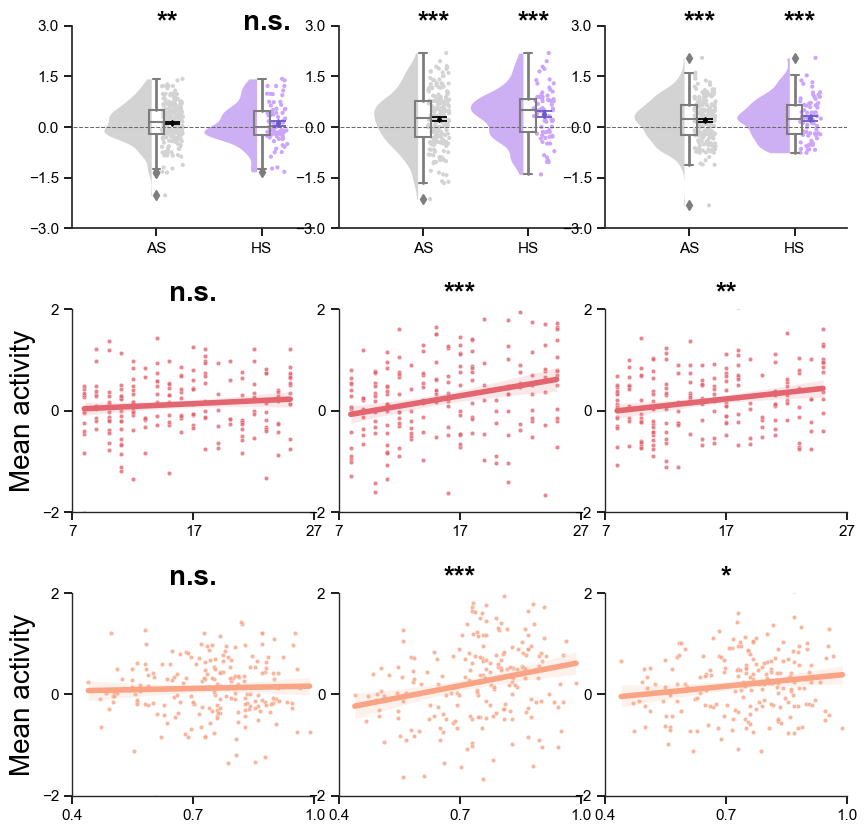

In [3]:
def multi_roi_analysis(query_condition, cmap_template, roi_names, rois, savepath):
    # specify subjects
    participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
    participants_data = pd.read_csv(participants_tsv, sep='\t')
    data = participants_data.query(query_condition)
    subjects = data['Participant_ID'].to_list()
    data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)

    # set cmap
    sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

    # Compute mean activity
    # Apply masks and get activity for each ROI
    roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, roi) for roi in rois]

    # Plotting
    fig, axes = plt.subplots(3, 3, figsize=(10,10))
    
    
    # Plot the mean activity for each ROI
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        print(roi_name,':')
        plot_mean_activity(roi_activity, data, axes[0, i])
        axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        if i > 0:
            axes[0, i].set_ylabel('')
        
    # Plot the covariate relationship for each ROI with 'Age'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name,'game1')
        if i > 0:
            axes[1, i].set_ylabel('')
        axes[1, i].set_xticks([7, 17, 27])
        axes[1, i].set_ylim([-2, 2])
        axes[1, i].set_yticks([-2, 0, 2])

    # Plot the covariate relationship for each ROI with 'Acc'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name,'game1')
        if i > 0:
            axes[2, i].set_ylabel('')
        axes[2, i].set_xticks([0.4, 0.7, 1.0])
        axes[2, i].set_ylim([-2, 2])
        axes[2, i].set_yticks([-2, 0, 2])

    for i in range(3):
        for j in range(3):
            if i < 2:
                axes[i, j].set_xlabel('')

    # Show the plot
    plt.subplots_adjust(wspace=0.1,hspace=0.4)
    #plt.subplot_tool()
    #plt.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    

query_condition = 'game1_fmri>=0.5'

# load rois
rois_names = ['EC','mPFC','HC']
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

rois = [ec,mPFC,hc]

cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/value_spct/Setall/6fold/{}/zmap/value_zmap.nii.gz'
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf4/Value_cdmulti-ROIs_effect_type2.pdf'
multi_roi_analysis(query_condition,cmap_template,rois_names,rois,savepath)

### Calculate the correlation distribution between distance modulation and value modulation

-0.0014192783700605052 0.06127179855500185


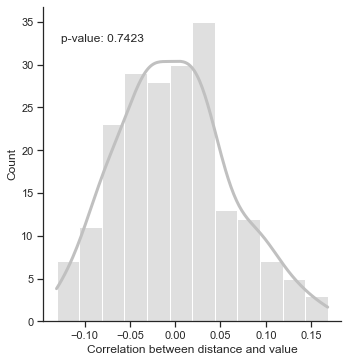

In [68]:
# specify subjects
participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
data = participants_data.query('game1_fmri>=0.5')
sub_list = data['Participant_ID'].to_list()

event1_tmp = r'/mnt/data/DCM/result_backup/2023.5.14/Events/game1/distance_spct/{}/6fold/{}_task-game1_run-{}_events.tsv'
event2_tmp = r'/mnt/data/DCM/result_backup/2023.5.14/Events/game1/value_spct/{}/6fold/{}_task-game1_run-{}_events.tsv'
corr_list = []
for sub in sub_list:
    mod1 = []
    mod2 = []
    for run_id in range(1,7):
        event1_path = event1_tmp.format(sub,sub,run_id)
        event2_path = event2_tmp.format(sub,sub,run_id)
        event1 = pd.read_csv(event1_path,sep='\t')
        event2 = pd.read_csv(event2_path,sep='\t')
        # corr = pearsonr(event1[event1['trial_type']=='distance']['modulation'].to_list(),
        #                  event2[event2['trial_type']=='value']['modulation'].to_list())[0]
        mod1.extend(event1[event1['trial_type'] == 'distance']['modulation'].to_list())
        mod2.extend(event2[event2['trial_type'] == 'value']['modulation'].to_list())
    corr = pearsonr(mod1,mod2)[0]
    corr_list.append(corr)

sns.displot(corr_list, color='silver',kde=True,facet_kws=dict(margin_titles=True),
            line_kws={'linewidth': 3, 'color': 'black'})

print(np.mean(corr_list),np.std(corr_list))
ttest_1samp(corr_list,0)
plt.xlabel("Correlation between distance and value")
plt.text(0.2, 0.9, f'p-value: {round(ttest_1samp(corr_list, 0)[1], 4)}', ha='center', va='center',
         transform=plt.gca().transAxes, fontsize=12)
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf4/Value_distance_corr.pdf', dpi=300, bbox_inches='tight'
            , pad_inches=0, transparent=True)

In [2]:
from nilearn import masking, image

# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
participants_data =  participants_data.query("(game1_fmri>=0.5)")
subjects_id = participants_data['Participant_ID'].to_list()

# set cmp template
m2_eucd_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/distance_cmap.nii.gz'
m2_value1_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/value1_cmap.nii.gz'
m2_value2_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/value2_cmap.nii.gz'

decision_eucd_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/decision_corrxdistance_cmap.nii.gz'
decision_value_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/value_cmap.nii.gz'

# m2_eucd_cmap = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/distance_spct/Setall/6fold/{}/cmap/distance_cmap.nii.gz'

# m2_value1_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn_test/game1/m2value_spct/Setall/6fold/{}/cmap/value1_cmap.nii.gz'
# m2_value2_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn_test/game1/m2value_spct/Setall/6fold/{}/cmap/value2_cmap.nii.gz'
#
# decision_eucd_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn_test/game1/distance_spct/Setall/6fold/{}/cmap/decision_corrxdistance_cmap.nii.gz'

# decision_value_cmap = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/value_spct/Setall/6fold/{}/cmap/value_cmap.nii.gz'

# set subjects cmap path
subs_m2_eucd = [m2_eucd_cmap.format(sub) for sub in subjects_id]
subs_m2_value1 = [m2_value1_cmap.format(sub) for sub in subjects_id]
subs_m2_value2 = [m2_value2_cmap.format(sub) for sub in subjects_id]
subs_decision_eucd = [decision_eucd_cmap.format(sub) for sub in subjects_id]
subs_decision_value = [decision_value_cmap.format(sub) for sub in subjects_id]

# set roi
#dmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/dmPFC/dmPFC_closed_dilated_resampled.nii.gz')
#vmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/vmPFC_bin.nii.gz')
#mpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/BN_mPFC.nii.gz')
mpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')
# extract mean activity of ROI for each subjects
data = pd.DataFrame()
scenarios = [("mpfc", "m2"), ("mpfc", "decision")]
for roi_name, onset in scenarios:
    for effect in ['eucd','value']:
        roi = eval(roi_name)
        if (onset == 'm2')and(effect=='value'):
            subs_cmap1 = eval(f'subs_{onset}_{effect}1')
            subs_cmap2 = eval(f'subs_{onset}_{effect}2')
            act1 = np.mean(masking.apply_mask(subs_cmap1, roi), axis=1)
            act2 = np.mean(masking.apply_mask(subs_cmap2, roi), axis=1)
            act = np.mean([act1,act2],axis=0)
        else:
            subs_cmap = eval(f'subs_{onset}_{effect}')
            act = np.mean(masking.apply_mask(subs_cmap, roi), axis=1)
        data = pd.concat([data,pd.DataFrame({'sub':subjects_id,'act':act,'onset':onset,'effect':effect,'ROI':roi_name})])

In [11]:
for onset in ['m2','decision']:
    for effect in ['eucd','value']:
        mean = data.query(f"onset=='{onset}' & effect=='{effect}'")['act'].mean()
        se = data.query(f"onset=='{onset}' & effect=='{effect}'")['act'].sem()
        print("onset:",onset,"effect:",effect,"mean:",mean,"se:",se)

onset: m2 effect: eucd mean: 0.26195204999596555 se: 0.09193209896592981
onset: m2 effect: value mean: 0.14236718659480843 se: 0.02475704168210831
onset: decision effect: eucd mean: 0.1718445331083735 se: 0.08462798463458532
onset: decision effect: value mean: 0.36557073028871717 se: 0.0816245284137867


In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('act ~ C(onset) + C(effect) + C(onset):C(effect)', data=data).fit()
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)

                       df      sum_sq   mean_sq         F    PR(>F)
C(onset)              1.0    0.899014  0.899014  0.773937  0.379263
C(effect)             1.0    0.278970  0.278970  0.240158  0.624225
C(onset):C(effect)    1.0    4.981814  4.981814  4.288712  0.038683
Residual            808.0  938.581469  1.161611       NaN       NaN


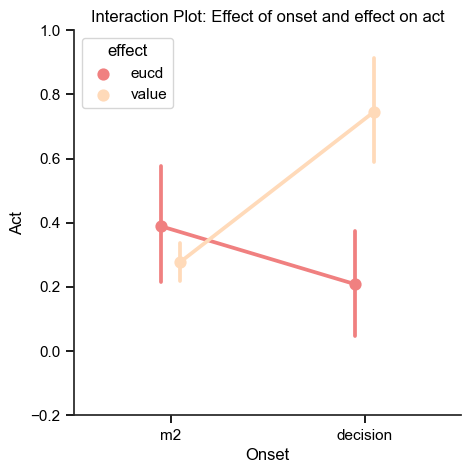

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

colorp = ['#F08080','#FFDAB9']

# Create an interaction plot with error bars
plt.figure(figsize=(5, 5))
sns.pointplot(x='onset', y='act', hue='effect', data=data, errorbar='se', dodge=0.1, palette=colorp)

# Adding details to the plot
plt.title('Interaction Plot: Effect of onset and effect on act')
plt.xlabel('Onset')
plt.ylabel('Act')
plt.ylim(-0.2, 1)
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf4/Value_distance_interaction_HP.pdf', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

ROI=mpfc | onset=m2|eucd t: 2.8494 p: 0.0048
ROI=mpfc | onset=m2|value t: 5.7506 p: 0.0
t: 1.2083 p: 0.2284
ROI=mpfc | onset=decision|eucd t: 2.0306 p: 0.0436
ROI=mpfc | onset=decision|value t: 4.4787 p: 0.0
t: -1.5782 p: 0.1161


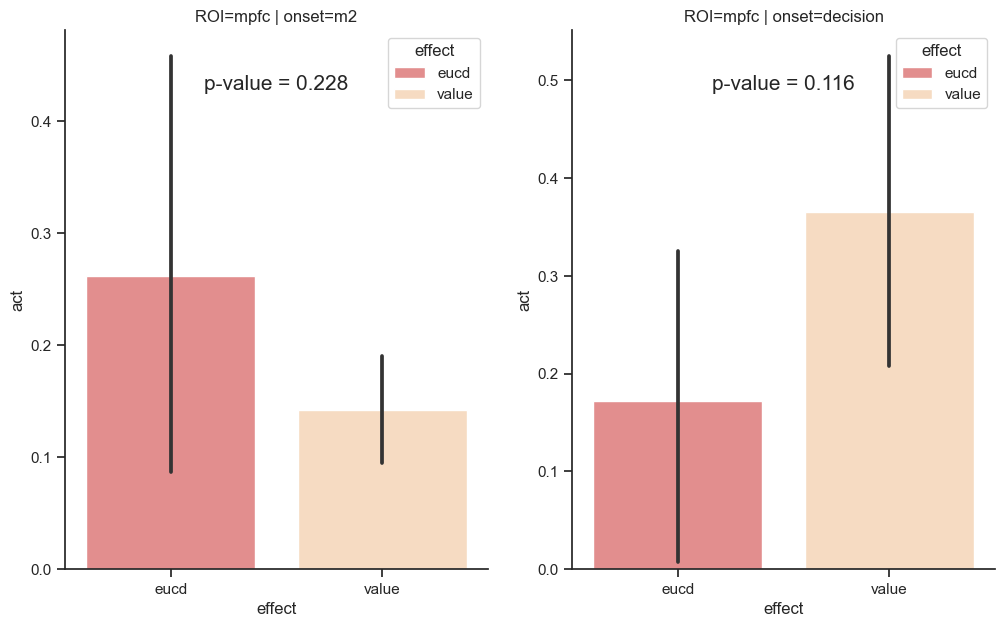

In [7]:
# Continue with the plotting as in the previous code snippet
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
colorp = ['#F08080','#FFDAB9']
for ax, (roi, onset) in zip(axs, scenarios):
    data_plot = data[(data['ROI'] == roi) & (data['onset'] == onset)]
    sns.barplot(x="effect", y="act", hue="effect", data=data_plot,
                alpha=1, ax=ax, palette=colorp,errcolor=".2",dodge=False)

    data1 = data_plot[data_plot['effect'] == 'eucd']['act']
    data2 = data_plot[data_plot['effect'] == 'value']['act']
    t,p = ttest_1samp(data1,0)
    print(f"ROI={roi} | onset={onset}|eucd",'t:', round(t,4), 'p:', round(p,4))

    t,p = ttest_1samp(data2,0)
    print(f"ROI={roi} | onset={onset}|value",'t:', round(t,4), 'p:', round(p,4))
    if not data1.empty and not data2.empty:
        t_stat, p_val = ttest_rel(data1, data2)
        ax.text(0.5, 0.9, f'p-value = {p_val:.3f}', horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes, size=15)
        print('t:', round(t_stat,4), 'p:', round(p_val,4))

    ax.set_title(f"ROI={roi} | onset={onset}")
#plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf4/Value_distance_separation.pdf', dpi=300, bbox_inches='tight'
            #, pad_inches=0, transparent=True)
plt.show()

## Plot align vs misalign

In [23]:
from nilearn import masking, image
# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data = participants_data.query('game1_fmri>=0.5')
subjects = data['Participant_ID'].to_list()
num = len(subjects)

# set camp
algin_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexModvalue_spct/Setall/6fold/{}/cmap/alignxvalue_cmap.nii.gz'
misalgin_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexModvalue_spct/Setall/6fold/{}/cmap/misalignxvalue_cmap.nii.gz'

sub_algin_cmaps = [algin_template.format(sub_id) for sub_id in subjects]
sub_misalgin_cmaps = [misalgin_template.format(sub_id) for sub_id in subjects]

# load mask
# rHC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
# lHC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
# hc = image.math_img('np.logical_or(img1,img2)', img1=rHC, img2=lHC)

#cd cd vmPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_mask_MNI152NL.nii.gz')

# load data
subs_align_mact = np.mean(masking.apply_mask(sub_algin_cmaps, vmPFC), axis=1)
subs_misalign_mact = np.mean(masking.apply_mask(sub_misalgin_cmaps, vmPFC), axis=1)

subs_mact = np.concatenate((subs_align_mact,subs_misalign_mact),axis=0)
hexModdistance_data = pd.DataFrame({'Activity':subs_mact,'Trials':num*['Aligned']+num*['Misaligned']})

In [24]:
# mean
t_statistic, p_value = ttest_1samp(subs_align_mact, 0)
print("Align's t:", t_statistic)
print("Align's p:", p_value)

t_statistic, p_value = ttest_1samp(subs_misalign_mact, 0)
print("Misalign's t:", t_statistic)
print("Misalign's p:", p_value)

t_statistic, p_value = ttest_rel(subs_align_mact, subs_misalign_mact)
print("Align vs Misalign's t:", t_statistic)
print("Align vs Misalign's p:", p_value)

Align's t: 1.1648038191800874
Align's p: 0.24547214568224787
Misalign's t: 1.5784496569832311
Misalign's p: 0.11602702175444651
Align vs Misalign's t: 0.3469965881886343
Align vs Misalign's p: 0.7289551140226842


NameError: name 'p2sign' is not defined

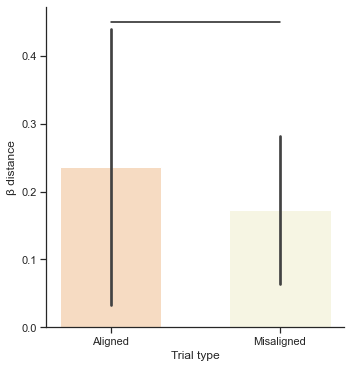

In [25]:
# Create the bar plot using seaborn
#reds = ['#f07167','#f8ad9d','#ffdab9']
colors= ['#FFDAB9','#F9F8E0']#

#colors = sns.color_palette("pastel")[:2][::-1]# '#FFD7D9'
g = sns.catplot(x="Trials", y="Activity", data=hexModdistance_data, kind="bar", errorbar='se', height=7, aspect=0.7,palette=colors,alpha=1,width=0.6)
g.fig.set_size_inches(5,5)

# set y title
g.ax.set_xlabel('Trial type')
g.ax.set_ylabel(u'\u03B2'+' distance')

# Set y ticks
#plt.xticks([0,1],['2D(Eucd)','1D(AP/DP)'])
# plt.yticks([0, 0.1, 0.2, 0.3, 0.4])

# Add tick lines to the bottom and left spines
g.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.tick_params(axis='y', which='both', left=True, right=False, direction='out')

# Add significance indicators
x1, x2 = 0, 1  # columns '2D' and '1D-AP' (first pair)
y, h, col = 0.45, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, p2sign(p_value), ha='center', va='bottom', color=col)

#savepath = r'/mnt/workdir/DCM/Result/paper/figure3/Park-mPFC/HexModDistance_ROI-Park-mpfc_6fold_alignVSmisalign.pdf'
#plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

# Show the plot
plt.show()

# Supplemental figure4:
- hexagonal modulation
- Brain map of hexagon game2(F-test)
- Control analysis:
-   scatter plot (show the hexagonal effect in EC doesn't covary with inference).
-   scatter plot (show the hexagonal effect in EC with place policy doesn't covary with inference).
(code see ROI analysis)


/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_204481/2062483198.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 0.1563 p: 0.876 Cohen's d: 0.0112
HP subjects: t: 2.4613 p: 0.0162 Cohen's d: 0.2881
mPFC :
All subjects: t: 6.8428 p: 0.0 Cohen's d: 0.4926
HP subjects: t: 9.3759 p: 0.0 Cohen's d: 1.0974
HC :
All subjects: t: 3.0013 p: 0.003 Cohen's d: 0.216
HP subjects: t: 5.3133 p: 0.0 Cohen's d: 0.6219
LOFC :
All subjects: t: 3.5199 p: 0.0005 Cohen's d: 0.2534
HP subjects: t: 4.8271 p: 0.0 Cohen's d: 0.565
PCC :
All subjects: t: 1.0053 p: 0.316 Cohen's d: 0.0724
HP subjects: t: 2.4831 p: 0.0154 Cohen's d: 0.2906


/tmp/ipykernel_204481/2062483198.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/2062483198.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_204481/2062483198.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/2062483198.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_204481/2062483198.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/2062483198.py:39:

EC Age r: 0.0913 p: 0.2065
mPFC Age r: 0.4025 p: 0.0
HC Age r: 0.1648 p: 0.022
LOFC Age r: 0.2207 p: 0.002
PCC Age r: 0.1046 p: 0.1479
EC Acc r: 0.1452 p: 0.044
mPFC Acc r: 0.4497 p: 0.0
HC Acc r: 0.3133 p: 0.0
LOFC Acc r: 0.2324 p: 0.0011
PCC Acc r: 0.1417 p: 0.0494


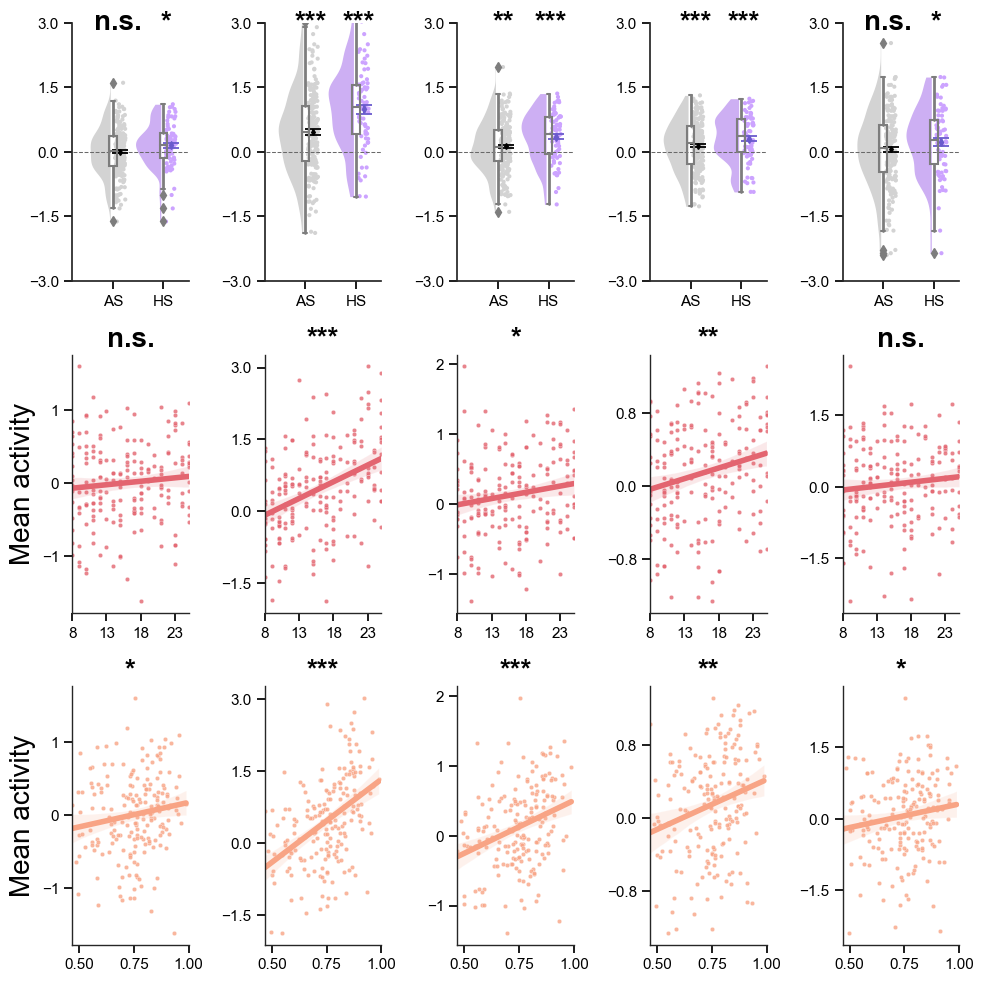

In [13]:
rois_names = ['EC','mPFC','HC','LOFC','PCC']

# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')

rois = [ec,mPFC,hc,ofc,pcc]
query_condition = 'game2_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/distance_spct/Setall/6fold/{}/zmap/distance_zmap.nii.gz'
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf5/Distance/Game2_distance_multi-ROIs_effect.pdf'

multi_roi_analysis(query_condition, cmap_template, rois_names, rois, savepath)

/tmp/ipykernel_204481/2062483198.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 0.5606 p: 0.5758 Cohen's d: 0.0403
HP subjects: t: 2.0209 p: 0.047 Cohen's d: 0.2365
mPFC :
All subjects: t: 5.5489 p: 0.0 Cohen's d: 0.3994
HP subjects: t: 7.1391 p: 0.0 Cohen's d: 0.8356
HC :
All subjects: t: 1.9525 p: 0.0523 Cohen's d: 0.1405
HP subjects: t: 3.9901 p: 0.0002 Cohen's d: 0.467
LOFC :
All subjects: t: 2.4344 p: 0.0158 Cohen's d: 0.1752
HP subjects: t: 4.0384 p: 0.0001 Cohen's d: 0.4727
PCC :


/tmp/ipykernel_204481/2062483198.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/2062483198.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_204481/2062483198.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/2062483198.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_204481/2062483198.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_204481/2062483198.py:39:

All subjects: t: 0.9883 p: 0.3242 Cohen's d: 0.0711
HP subjects: t: 2.9807 p: 0.0039 Cohen's d: 0.3489
EC Age r: 0.0592 p: 0.4133
mPFC Age r: 0.3067 p: 0.0
HC Age r: 0.1577 p: 0.0285
LOFC Age r: 0.1835 p: 0.0106
PCC Age r: 0.1458 p: 0.0431
EC Acc r: 0.1204 p: 0.0955
mPFC Acc r: 0.3748 p: 0.0
HC Acc r: 0.2552 p: 0.0003
LOFC Acc r: 0.2552 p: 0.0003
PCC Acc r: 0.1823 p: 0.0111


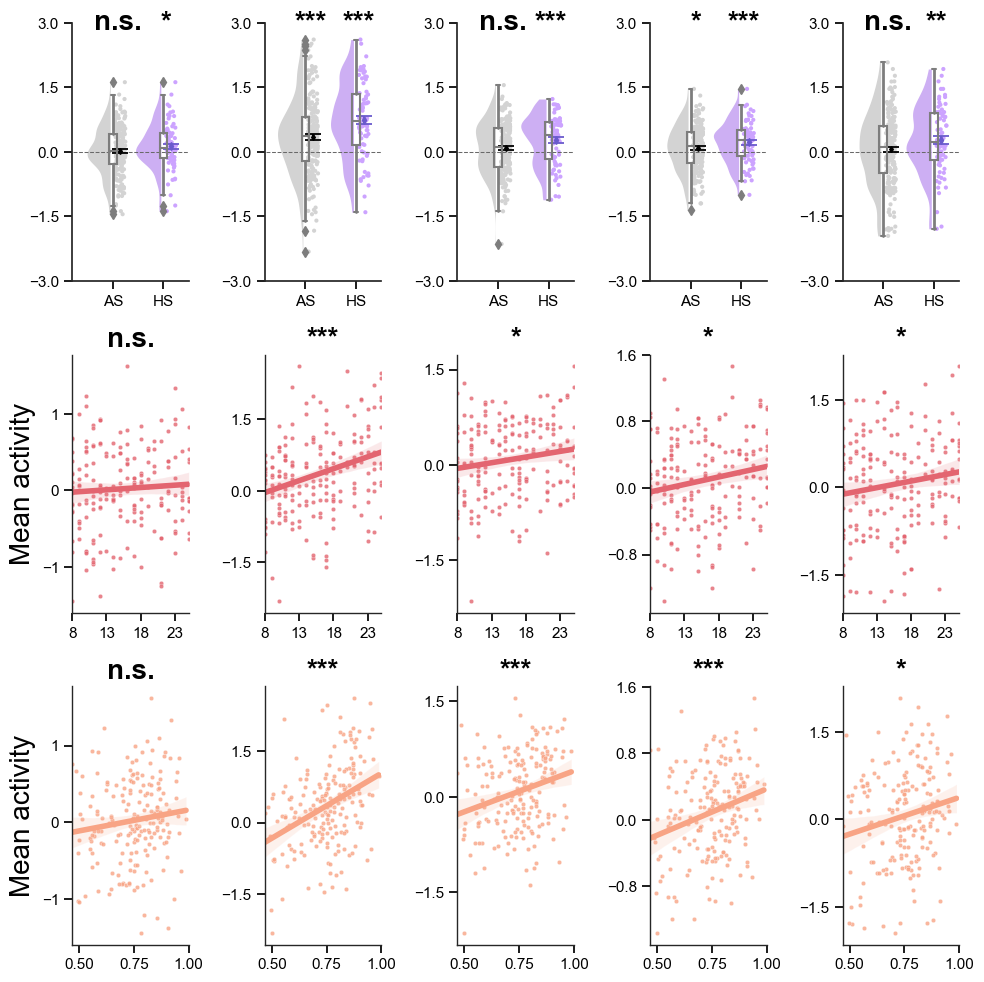

In [14]:
query_condition = 'game2_fmri>=0.5'
cmap_template = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game2/hexModdistance_spct/Setall/6fold/{}/zmap/hexModdistance_zmap.nii.gz'
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf5/Distance/Game2_HexModdistance_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition,cmap_template,rois_names,rois,savepath)

In [47]:
from sklearn.preprocessing import MinMaxScaler

metrics = pd.read_csv(r'/mnt/workdir/DCM/Result/analysis/brain_metrics_game1_20230914.csv')

metrics['mPFC.thickness'] = (metrics['lh.mPFC.thickness'] + metrics['rh.mPFC.thickness'])/2
metrics['EC.thickness'] = (metrics['lh.EC.thickness'] + metrics['rh.EC.thickness'])/2

In [ ]:
# Initialize a scaler
scaler = MinMaxScaler()

brain_measures = ['EC.thickness','mPFC.thickness']
beh_measures = ['Age','game1_acc']

# Initialize the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharey='row')

from matplotlib.ticker import MaxNLocator

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Compute pearson correlation
        r, p = pearsonr(metrics[brain_measure], metrics[beh_measure])
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        if 'EC' in brain_measure:
            color = '#F8B8A9'
            label= 'EC'
        elif 'mPFC' in brain_measure:
            color = '#D3C1E0'
            label= 'mPFC'

        sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=30, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 5}, ax=axs[i],label=label)

        # Setup labels and despine
        axs[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i].set_ylabel('Thickness (mm^2)', fontsize=15)

        title = p2sign(p)
        axs[i].set_title(title, size=20, fontweight='bold')
        axs[i].legend(loc='upper left', fontsize=10)

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural-thickness_behavior.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# show the plot
plt.show()

Correlation between HC.volume and Age
r 0.234 p 0.001
Correlation between HC.FA and Age
r 0.25 p 0.001
Correlation between HC.volume and game2_test_acc
r 0.301 p 0.0
Correlation between HC.FA and game2_test_acc
r 0.153 p 0.05


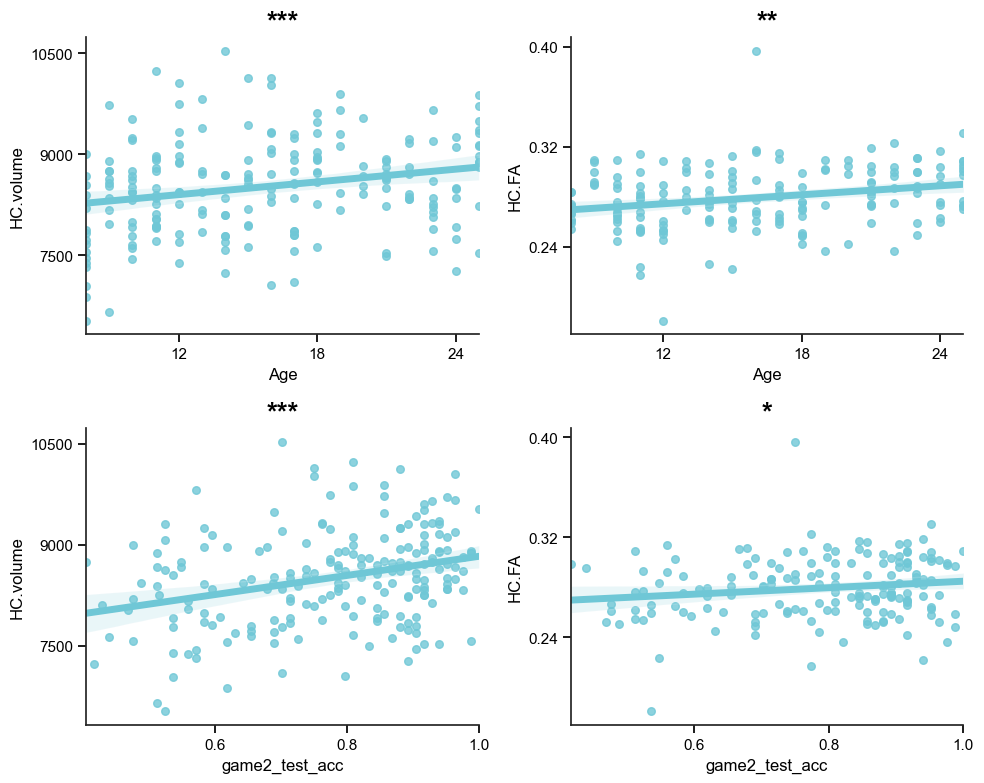

In [49]:
brain_measures = ['HC.volume', 'HC.FA']
beh_measures = ['Age','game2_test_acc']

# Initialize the plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Extract the relevant columns
        x = metrics[beh_measure]
        y = metrics[brain_measure]

        # Compute correlation handling NaN
        if ('FA' in brain_measure) or ('game2' in beh_measure):
            idx = np.isfinite(x) & np.isfinite(y)
            r, p = pearsonr(x[idx], y[idx])
        else:
            r, p = pearsonr(x, y)

        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        #sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=20, ax=axs[i])
        color = '#6FC7D6'
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=True,line_kws={'linewidth': 5}, ax=axs[i][j],scatter_kws={'s':30})

        # Setup labels and despine
        axs[i][j].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i][j].yaxis.set_major_locator(MaxNLocator(nbins=3))

        #axs[i].set_ylabel('Mean volume (mm^3/NVoxel)', fontsize=15)
        title = p2sign(p)
        axs[i][j].set_title(title, size=20, fontweight='bold')

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_HC-structure_behavior_game2_acc.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)
 
# Show the plot
plt.show()

In [53]:
from pingouin import partial_corr
partial_corr(data=metrics,x='HC.FA',y='game2_test_acc')

,n,r,CI95%,p-val
pearson,166,0.152567,"[0.0, 0.3]",0.049724
